In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv("Traffic_Violations.csv", header = 0)

In [92]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [95]:
df.Race.value_counts() / df.Race.value_counts().sum()

WHITE              0.358217
BLACK              0.316215
HISPANIC           0.211375
ASIAN              0.058309
OTHER              0.053657
NATIVE AMERICAN    0.002227
Name: Race, dtype: float64

In [44]:
all_races = df.Race.tolist()

['BLACK',
 'WHITE',
 'BLACK',
 'BLACK',
 'WHITE',
 'WHITE',
 'HISPANIC',
 'HISPANIC',
 'WHITE',
 'WHITE',
 'WHITE',
 'HISPANIC',
 'WHITE',
 'WHITE',
 'ASIAN',
 'BLACK',
 'BLACK',
 'BLACK',
 'WHITE',
 'BLACK',
 'WHITE',
 'HISPANIC',
 'WHITE',
 'BLACK',
 'HISPANIC',
 'OTHER',
 'BLACK',
 'WHITE',
 'HISPANIC',
 'HISPANIC',
 'WHITE',
 'WHITE',
 'BLACK',
 'ASIAN',
 'BLACK',
 'BLACK',
 'BLACK',
 'BLACK',
 'HISPANIC',
 'WHITE',
 'ASIAN',
 'BLACK',
 'WHITE',
 'WHITE',
 'ASIAN',
 'WHITE',
 'BLACK',
 'HISPANIC',
 'HISPANIC',
 'WHITE',
 'HISPANIC',
 'BLACK',
 'BLACK',
 'WHITE',
 'HISPANIC',
 'BLACK',
 'HISPANIC',
 'BLACK',
 'HISPANIC',
 'WHITE',
 'BLACK',
 'BLACK',
 'BLACK',
 'BLACK',
 'WHITE',
 'WHITE',
 'NATIVE AMERICAN',
 'WHITE',
 'BLACK',
 'OTHER',
 'WHITE',
 'WHITE',
 'OTHER',
 'WHITE',
 'OTHER',
 'HISPANIC',
 'BLACK',
 'HISPANIC',
 'BLACK',
 'BLACK',
 'BLACK',
 'ASIAN',
 'BLACK',
 'HISPANIC',
 'BLACK',
 'WHITE',
 'BLACK',
 'HISPANIC',
 'WHITE',
 'HISPANIC',
 'WHITE',
 'HISPANIC',
 'BLACK',


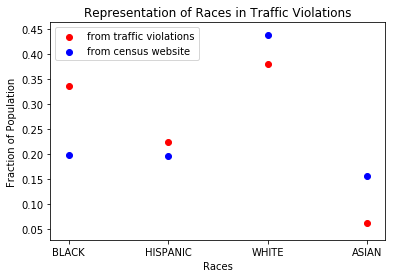

In [97]:
plt.scatter(x = ["BLACK", "HISPANIC", "WHITE", "ASIAN"], y = [428639/1279777, 286525/1279777, 485574/1279777, 79039/1279777], color = "red", label = "from traffic violations")
plt.scatter(x = ["BLACK", "HISPANIC", "WHITE", "ASIAN"], y = [.197, .196, .438, .156], color = "blue", label = "from census website")
plt.legend()
plt.ylabel("Fraction of Population")
plt.xlabel("Races")
plt.title("Representation of Races in Traffic Violations")
plt.show()

The blue scatter plot shows what fraction of the population is made up by each race, according to the US Census Bureau. The red scatter plot shows what fraction of those charged with traffic violations is made up by each race. From this visual, it's clear that White and Asian people are underrepresented when it comes to traffic violations. On the other hand, Hispanic people are overrepresented, while Black people are severely overrepresented.

In [103]:
df["Hour"] = pd.to_datetime(df["Time Of Stop"]).dt.hour

In [104]:
df.Hour.value_counts()

22    105334
23    103033
21     75096
0      74549
8      71837
10     68760
17     68330
9      67175
16     64820
1      60439
11     57508
14     55333
18     53861
13     53466
20     52708
12     52191
7      47844
19     47741
15     47325
2      46254
3      30817
6      20161
4      18660
5      12288
Name: Hour, dtype: int64

In [119]:
df.Hour.value_counts().sort_values()

5      12288
4      18660
6      20161
3      30817
2      46254
15     47325
19     47741
7      47844
12     52191
20     52708
13     53466
18     53861
14     55333
11     57508
1      60439
16     64820
9      67175
17     68330
10     68760
8      71837
0      74549
21     75096
23    103033
22    105334
Name: Hour, dtype: int64

Text(0.5,1,'Number of Traffic Violations During Each Hour of the Day')

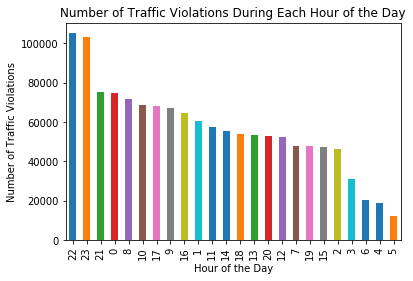

In [171]:
df.Hour.value_counts().plot.bar()
plt.ylabel("Number of Traffic Violations")
plt.xlabel("Hour of the Day")
plt.title("Number of Traffic Violations During Each Hour of the Day")

This bar plot shows the number of traffic violations that were recorded at every hour of the day. The highest volume of traffic violations occur between 9PM and midnight, and the fewest traffic violations happen in early morning (between 4AM and 6AM).

In [124]:
df.Longitude

0                NaN
1         -77.092757
2         -77.229088
3         -76.954633
4                NaN
5                NaN
6         -77.079552
7                NaN
8                NaN
9                NaN
10        -77.281540
11        -77.100755
12        -76.969678
13        -77.093105
14        -77.253581
15        -76.986962
16        -77.070628
17        -77.167050
18               NaN
19        -77.253690
20               NaN
21        -77.149410
22               NaN
23        -76.984722
24        -77.232998
25        -77.005105
26        -77.097010
27               NaN
28        -77.003847
29        -77.232998
             ...    
1355500   -77.155747
1355501   -77.153698
1355502   -77.149952
1355503   -77.103127
1355504   -77.096588
1355505   -76.943325
1355506   -76.946780
1355507   -76.946965
1355508   -77.039910
1355509   -77.111317
1355510   -77.110190
1355511   -77.115242
1355512   -77.208872
1355513   -77.053952
1355514   -77.053952
1355515   -77.053952
1355516   -77

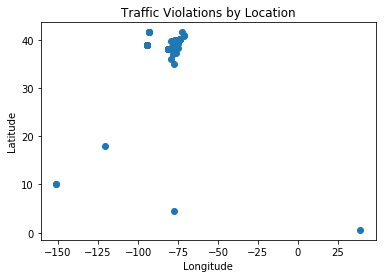

In [172]:
plt.scatter(x=df.Longitude, y=df.Latitude)
plt.title("Traffic Violations by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Here, the locations (as represented by latitude and longitude) of all of the traffic violations are plotted. There is one very dense spot on the graph, which shows the location of where a significant majority of the traffic violations are occurring/caught. Then there are some geographic outliers. 

In [133]:
df.State.value_counts()

MD    1184734
VA      57047
DC      34129
XX      10771
PA       9730
FL       6196
TX       5720
NC       5133
WV       5092
NY       4479
NJ       3831
GA       2908
DE       2550
CA       2244
OH       2221
MA       1757
IL       1471
SC       1454
TN       1261
MI       1112
AZ        970
CT        935
IN        889
AL        698
US        557
OK        518
KY        500
WA        468
MO        461
CO        456
       ...   
NV        220
UT        219
OR        190
KS        166
VT        152
AK        141
ON        127
ID        115
MT         93
ND         91
NE         76
HI         67
MB         57
SD         55
WY         44
NB         38
QC         34
VI         23
AB         12
GU         12
PR         11
PQ          8
NS          5
BC          5
PE          3
AS          2
NF          2
SK          1
MH          1
IT          1
Name: State, Length: 70, dtype: int64

In [137]:
df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

In [142]:
df.Year

0          2008.0
1          2001.0
2          2001.0
3          1998.0
4          2015.0
5          2013.0
6          1993.0
7          2003.0
8          2015.0
9          2015.0
10         2005.0
11         1996.0
12         2004.0
13         2005.0
14         2002.0
15         2009.0
16         2000.0
17         2003.0
18         2015.0
19         2005.0
20         2015.0
21         2002.0
22         2015.0
23         1991.0
24         2005.0
25         2004.0
26         2012.0
27         2005.0
28            NaN
29         2005.0
            ...  
1355500    2006.0
1355501    2013.0
1355502    2012.0
1355503    2016.0
1355504    2009.0
1355505    2007.0
1355506    2005.0
1355507    2012.0
1355508    2013.0
1355509    2007.0
1355510    2011.0
1355511    2005.0
1355512    2017.0
1355513    2013.0
1355514    2013.0
1355515    2013.0
1355516    1998.0
1355517    2010.0
1355518    1997.0
1355519    2013.0
1355520    2002.0
1355521    2002.0
1355522    2018.0
1355523    2015.0
1355524   

In [148]:
df_Year = df.Year.value_counts()

2006.0    83292
2007.0    82654
2005.0    81541
2004.0    79874
2003.0    76070
2008.0    73678
2012.0    72474
2002.0    69557
2013.0    68943
2011.0    68456
2010.0    65947
2001.0    59987
2000.0    59499
2014.0    56381
2009.0    55632
2015.0    47789
1999.0    45170
1998.0    35202
2016.0    31944
1997.0    28910
1996.0    20876
1995.0    18458
2017.0    16421
1994.0    13240
1993.0     7678
1992.0     6281
1991.0     4120
2018.0     3882
1990.0     3291
1989.0     1855
          ...  
8.0           1
4004.0        1
5015.0        1
1776.0        1
9.0           1
5256.0        1
1886.0        1
1887.0        1
1894.0        1
1899.0        1
5237.0        1
1902.0        1
2331.0        1
1925.0        1
5199.0        1
1936.0        1
4112.0        1
1939.0        1
1951.0        1
2373.0        1
4706.0        1
2452.0        1
2483.0        1
2500.0        1
4452.0        1
2502.0        1
4313.0        1
4146.0        1
4122.0        1
1959.0        1
Name: Year, Length: 316,

In [158]:
df.iloc[1:100, 20].value_counts()

2000.0    10
2005.0     8
2001.0     6
2011.0     6
2015.0     6
2002.0     6
2008.0     6
2012.0     5
2013.0     5
1996.0     5
1998.0     4
2003.0     4
2004.0     4
1999.0     4
2006.0     4
2007.0     3
1997.0     2
2017.0     2
2016.0     2
2009.0     2
1991.0     1
1994.0     1
1993.0     1
Name: Year, dtype: int64

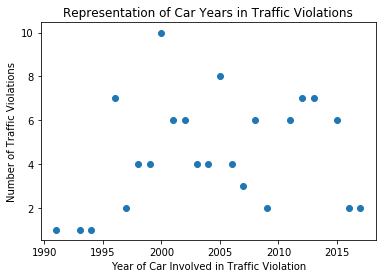

In [173]:
x = df.iloc[1:100, 20].value_counts()
plt.scatter(x = [2000, 2005, 2001, 2011, 2015, 2002, 2008, 2012, 2013, 1996, 1998, 2003, 2004, 1999, 2006, 2007, 1997, 2017, 2016, 2009, 1991, 1994, 1993], 
            y = [10, 8, 6, 6, 6, 6, 6, 7, 7, 7, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1])
plt.xlabel("Year of Car Involved in Traffic Violation")
plt.ylabel("Number of Traffic Violations")
plt.title("Representation of Car Years in Traffic Violations")
plt.show()

Looking at the first one hundred traffic violations, there was no correlation between the year of the car involved in the traffic violation and the number of traffic violations. Were there a correlation, it might have revealed a bias of the police - where they were targeting a certain type/age of car more or less than others.